<a href="https://colab.research.google.com/github/0Kyumy0/Machine_Learning_CodingDojo/blob/Supervised_models/exerciseLogRegresRandomFKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
filename = '/content/drive/MyDrive/DataScience/Semana7/Wine_cultivars.csv'
df = pd.read_csv(filename)
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


La tarea es:

1) Utilizar un modelo de regresión logística e intentar tanto la regularización L1 como L2. Esta es una gran oportunidad para mostrar que afinar los hiperparámetros puede afectar los resultados del modelo. 

2) Después de hacer eso, intenter usar los modelos de KNN y bosque aleatorio. 

3) Aborden estas preguntas en una celda de texto al final de sus códigos:

¿Cuál es el modelo que mejor funciona? 
¿Cuáles hiperparámetros afinaron para cada uno de los modelos? ¿Hay algún modelo que les gustó más y por qué?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
df['Class label'].value_counts(normalize=True)

2    0.398876
1    0.331461
3    0.269663
Name: Class label, dtype: float64

# Regresión logística

<Axes: >

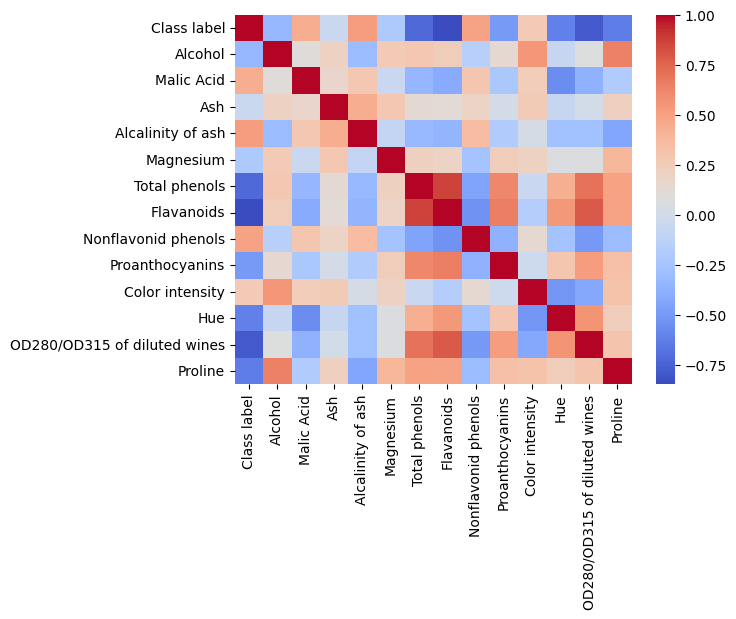

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm')

In [ ]:
y = df['Class label']
X = df.drop(columns='Class label')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

In [ ]:
logreg = LogisticRegression()
scaler = StandardScaler()

logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)

print(logreg_pipe.score(X_train, y_train)*100)
print(logreg_pipe.score(X_test, y_test)*100)

100.0
98.61111111111111


{0.0001: 0.3611111111111111,
 0.001: 0.3611111111111111,
 0.01: 0.3611111111111111,
 0.1: 0.9861111111111112,
 1: 0.9861111111111112,
 10: 0.9861111111111112,
 100: 0.9861111111111112,
 1000: 0.9861111111111112}

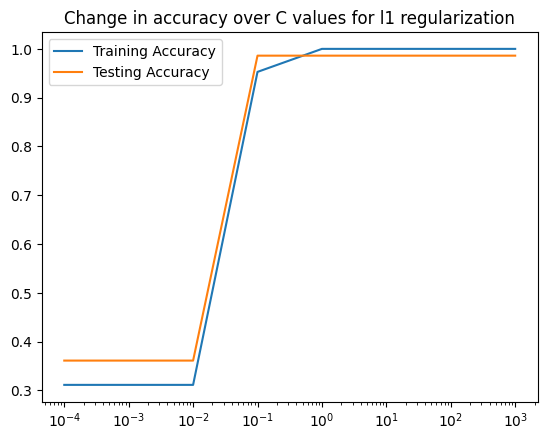

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=300, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [ ]:
valor_max = max(test_scores)
indice_valor_max = test_scores.index(valor_max)
mejor_c_value = c_values[indice_valor_max]
print(mejor_c_value)
print(valor_max)

0.1
0.9861111111111112


{0.0001: 0.9027777777777778,
 0.001: 0.9166666666666666,
 0.01: 0.9444444444444444,
 0.1: 0.9722222222222222,
 1: 0.9861111111111112,
 10: 0.9861111111111112,
 100: 0.9861111111111112,
 1000: 0.9861111111111112}

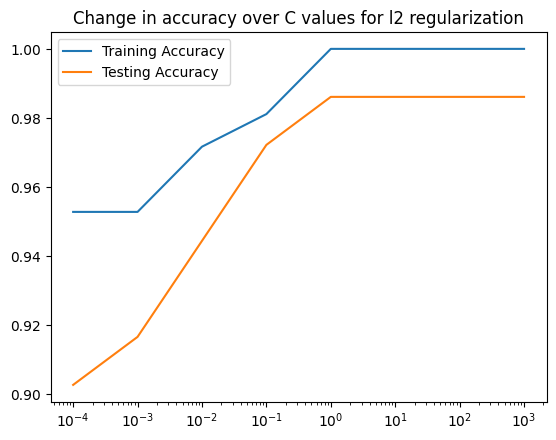

In [ ]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=300, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [ ]:
valor_max = max(test_scores)
indice_valor_max = test_scores.index(valor_max)
mejor_c_value = c_values[indice_valor_max]
print(mejor_c_value)
print(valor_max)

1
0.9861111111111112


In [ ]:
logreg = LogisticRegression(C = 1, max_iter=300, solver='liblinear', penalty='l2')
scaler = StandardScaler()

logreg_pipe = make_pipeline(scaler, logreg)
logreg_pipe.fit(X_train, y_train)
print((logreg_pipe.score(X_train, y_train))*100)
print((logreg_pipe.score(X_test, y_test))*100)

100.0
98.61111111111111


# KNN

In [ ]:
scaler_knn = StandardScaler()
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(scaler_knn, knn)
knn_pipe.fit(X_train, y_train)

predictions_knn = knn_pipe.predict(X_test)
acc_score = knn_pipe.score(X_test, y_test)
acc_score*100

93.05555555555556

In [ ]:
from sklearn.model_selection import GridSearchCV

k_values = list(range(1, 50, 1))

param_grid = {'n_neighbors': k_values}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='f1_micro')
grid.fit(X_train, y_train)

print("El valor óptimo de K es:", grid.best_params_['n_neighbors'])

El valor óptimo de K es: 28


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=28)

knn_best_pipe = make_pipeline(scaler_knn, knn_best)
knn_best_pipe.fit(X_train, y_train)

predictions_knn_best = knn_best_pipe.predict(X_test)
acc_score = knn_best_pipe.score(X_test, y_test)
acc_score*100

95.83333333333334

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_predicts = rf.predict(X_test)

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score*100)
print(rf_test_score*100)

100.0
100.0


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': list(range(1, 40, 2))}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']

rfc_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth =2, random_state=42)
rfc_best.fit(X_train, y_train)

accuracy = rfc_best.score(X_test, y_test)

In [ ]:
print(best_n_estimators)
print(accuracy)

13
0.9166666666666666


In [ ]:
max_depth_range = list(range(2, 50))

r2 = []
for depth in max_depth_range:
    dec_tree = RandomForestClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

In [ ]:
valor_max = max(r2)
indice_valor_max = r2.index(valor_max)
mejor_max_depth = max_depth_range[indice_valor_max]
print(mejor_max_depth)
print(valor_max)

4
1.0


In [ ]:
rf_best = RandomForestClassifier(random_state=42, n_estimators=13, max_depth=4)
rf_best.fit(X_train, y_train)
rf_best_predicts = rf_best.predict(X_test)
rf_best_train_score = rf_best.score(X_train, y_train)
rf_best_test_score = rf_best.score(X_test, y_test)
print(rf_best_train_score*100)
print(rf_best_test_score*100)

100.0
100.0


# Questions

* What is the model that works best?

The model that worked best was the Random Forest as it gave me 100% accuracy for both training and test data.

* What hyperparameters did you tune for each of the models?

For the case of logistic regression (C, max_iter, solver, penalty), for KNN (n_neighbors), and for Random Forest (n_estimators, max_depth).

* Is there a model that you liked the most and why?

The model that I liked the most was Logistic Regression, as the values did not have 100% accuracy in both cases, which does not give me much confidence and could indicate overfitting.